# TAREA

Milca Lilian Correa Sanchez 
9/oct

## Integración Montecarlo

1. Realizar las siguientes integrales. Poner los resultados en una tabla cuyas filas correspondan a la cantidad de términos utilizados en la aproximación (usar 10, 100, 1000, 10000 y 100000 términos) y cuyas columnas correspondan a las funciones.
    + $\int_{1}^{3} e^{x}\log(x)\text{d}x$.
    + $\int_1^3 \sin(x)\ln(x) \text{d}x$

In [4]:
import numpy as np
import pandas as pd


def g(x):
    return np.exp(x) * np.log10(x)
def f(x):
    return np.sin(x) * np.log(x)


a = 1
b = 3
N = np.logspace(1, 5, 5)

table = pd.DataFrame(columns=["Aproximacion g(x)", "Error g(x)", "Aproximacion f(x)", "Error f(x)"], index=N)


def montecarlo(f, N, a, b):
    u = np.random.uniform(a, b, N)
    media = np.mean(f(u))
    return media * (b - a)


for i in N:
    aproximacion1 = montecarlo(g, int(i), a, b)
    aproximacion2 = montecarlo(f, int(i), a, b)
    table.loc[i, "Aproximacion g(x)"] = aproximacion1
    table.loc[i, "Error g(x)"] = abs(6.09207 - aproximacion1)
    table.loc[i, "Aproximacion f(x)"] = aproximacion2
    table.loc[i, "Error f(x)"] = abs(0.8698 - aproximacion2)

table


,Aproximacion g(x),Error g(x),Aproximacion f(x),Error f(x)
10.0,7.478319,1.386249,0.808183,0.061617
100.0,6.077874,0.014196,0.85466,0.01514
1000.0,6.046603,0.045467,0.864732,0.005068
10000.0,6.135593,0.043523,0.862514,0.007286
100000.0,6.089936,0.002134,0.869774,0.000026


2. Aproximar el área de la región descrita por

$$x^2+2y^2\leq-2x+8y-7$$

Poner los resultados en una tabla cuyas filas correspondan a la cantidad de términos utilizados en la aproximación (usar 10, 100, 1000, 10000 y 100000 términos) y en las columnas el valor de aproximación y el error relativo.

Definir unos límites adecuados $a_1$, $b_1$, $a_2$ y $b_2$, para la región $R=\left[a_1,b_1\right]\times\left[a_2,b_2\right]$

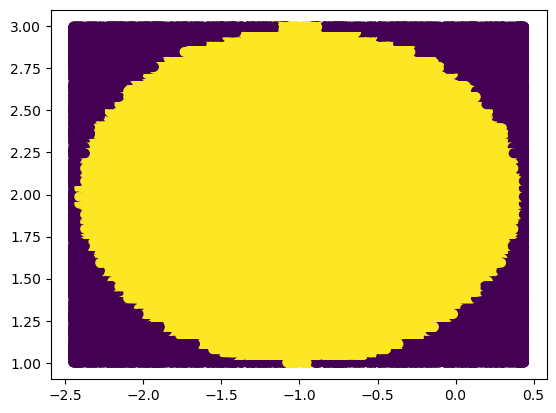

In [15]:
import numpy as np
import matplotlib.pyplot as plt

def bernoulli(x, y):
    return (x**2) + 2*y**2 <= -2*x + 8*y - 7

num = 600
x = np.random.uniform(-2.45, 0.45, num)
y = np.random.uniform(3, 1, num)

X, Y = np.meshgrid(x, y)
plt.figure()
plt.scatter(X, Y, c=bernoulli(X, Y))  
plt.show()


In [17]:
import numpy as np
import pandas as pd

def montecarlo(region, xa, xb, ya, yb, N):
    x = np.random.uniform(xa, xb, N)
    y = np.random.uniform(ya, yb, N)
    B = region(x, y)
    AR = (xb - xa) * (yb - ya)
    return np.mean(B) * AR

def montecarlo2(region, xa, xb, ya, yb, N):
    x = np.random.uniform(xa, xb, N)
    y = np.random.uniform(ya, yb, N)
    B = region(x, y)
    AR = (xb - xa) * (yb - ya)
    return np.mean(B) * AR

N = np.logspace(1, 5, 5)

table = pd.DataFrame(columns=["Aproximación", "Error Relativo"], index=N)
table2 = pd.DataFrame(columns=["Aproximación", "Error"], index=N)

for i in N:
    xa = -2.5
    xb = 0.5
    ya = 0.9
    yb = 3.1

    AR = (xb - xa) * (yb - ya)

    AD1 = montecarlo(bernoulli, xa, xb, ya, yb, int(i))
    C_rel1 = ((1 - (AD1 / AR)) / (AD1 / AR)) ** (1 / 2)
    error1 = np.log10(C_rel1) - ((1 / 2) * np.log10(i))

    table.loc[i, "Aproximación"] = AD1
    table.loc[i, "Error Relativo"] = error1

    xa2 = -2.45
    xb2 = 0.45
    ya2 = 1
    yb2 = 3

    AD2 = montecarlo2(bernoulli, xa2, xb2, ya2, yb2, int(i))
    C2 = (((1 - (AD2 / AR)) / (AD2 / AR)) ** (1 / 2))
    error2 = np.log10(C2) - ((1 / 2) * np.log10(i))

    table2.loc[i, "Aproximación"] = AD2
    table2.loc[i, "Error"] = error2

table, table2


(         Aproximación Error Relativo
 10.0             3.96      -0.588046
 100.0           4.488      -1.163679
 1000.0         4.6134      -1.682955
 10000.0       4.42332      -2.153977
 100000.0     4.430382      -2.655029,
          Aproximación     Error
 10.0             4.64 -0.687131
 100.0           4.408 -1.151701
 1000.0         4.3152 -1.638076
 10000.0       4.47876 -2.162284
 100000.0     4.441234 -2.656649)

3. Describe 3 casos de uso de integración Montecarlo en tu ingeniería.

Valoración de opciones financieras:
Monte Carlo se utiliza para calcular el precio justo de opciones, como opciones de compra y venta, modelando miles de posibles trayectorias de precios futuras y calculando el valor esperado de la opción al vencimiento.

Gestión de riesgos:
Monte Carlo se utiliza para evaluar el riesgo de una cartera, simular varios escenarios de mercado y calcular indicadores de riesgo como el VaR para tomar decisiones de gestión de riesgos.

Simulación de rentabilidad de cartera:
Monte Carlo se utiliza para evaluar el desempeño y el riesgo de diferentes estrategias simulando el desempeño futuro de los activos.